# Soil geometry

This notebook visualizes soil geometries and saves their figures. Soil geometry is expressed by a matrix of diffusion coefficients corresponding to soil types. The matrix is created by interpolating a seed soil matrix, which is a 2D array with a minimum 5 x 5 size. For our simulation, three types of soils are used. So, three diffusion coefficients are defined and are used to create a seed soil matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from modules.classes import Quantity2D, Analytic, Interpolate
from modules.integrator import forward_euler_final
from modules.geometries import *
from modules.tests import plot_mass_conservation, test_gaussian

## Common setup


In [2]:
#### common setup

n_grid = 100
n_time = 5000
dt = 0.0001
dx = 0.01  # meter
dy = 0.01

scaling_factor = 3.15576e10

# Diffusion coefficients of soils m^2 s^-1
D_high = 5.0e-12 * scaling_factor
D_midium = 1.0e-12 * scaling_factor
D_low = 5.0e-13 * scaling_factor
D_background = 2.5e-12 * scaling_factor


conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

# array of actual x and y values on grid points
xcoords = conc.xcoords
ycoords = conc.ycoords

X, Y = np.meshgrid(xcoords, ycoords)

# create a 100 x 100 grid to hold factors for a gausian distribution
# initial_condition = 1*np.exp(- (X**2 + Y**2)/(0.05*dx*n_grid)**2)
initial_condition = 1*np.exp(- (X**2 + Y**2)/(0.1*dx*n_grid)**2)
sources =  1*np.exp(- (X**2 + Y**2)/(0.1*dx*n_grid)**2)


### Check the distribution of initial conditions and sources

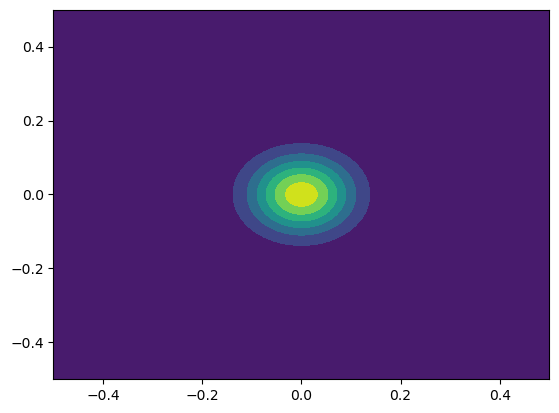

In [3]:
plt.contourf(X, Y, initial_condition)
plt.show()

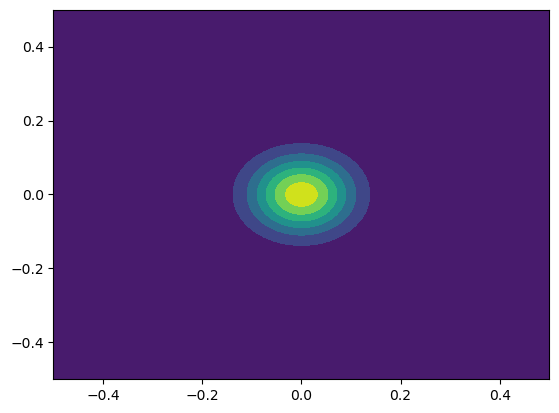

In [4]:
plt.contourf(X, Y, sources)
plt.show()

### Stability test

The stability of setting values should be checked with $\frac{(D \times dt)}{(dx)^2}$ < 0.5.


In [5]:
tested = (D_midium * dt) / dx**2
if tested < 0.5:
    print(f'Passed the stability test with {tested}')
else:
    print(f'Failed the stability test with {tested}')


Passed the stability test with 0.0315576


## Soil Geometries

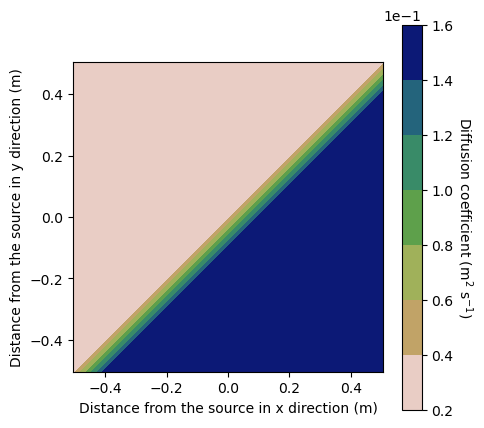

In [6]:
fig_t2, ax_t2 = plot_soil_geometry(conc, triangle_2, [D_high, D_midium], D_background)
fig_t2.savefig(f'./plots/soil_matrix_{triangle_2.__name__}.png')


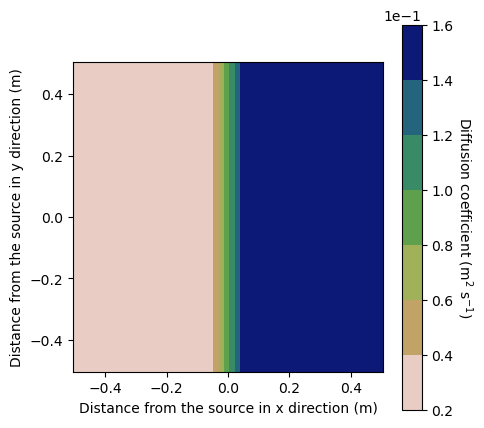

In [7]:
fig_sqv2, ax_sqv2 = plot_soil_geometry(conc, square_vertical_2layers, [D_high, D_midium], D_background)
fig_sqv2.savefig(f'./plots/soil_matrix_{square_vertical_2layers.__name__}.png')


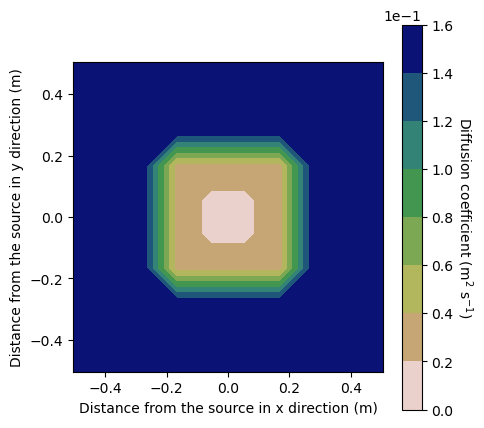

In [13]:
fig_s, ax_s = plot_soil_geometry(conc, square_layers, [D_high, D_midium, D_low], D_background)
fig_s.savefig(f'./plots/soil_matrix_{square_layers.__name__}.png')


## Simulation


### Layered Square

In [9]:
diffusion_sql = create_soil_geometry(conc, square_layers, [D_high, D_midium, D_low], D_background)
result_ds_sql = forward_euler_final(conc, diffusion_sql, initial_condition, sources)


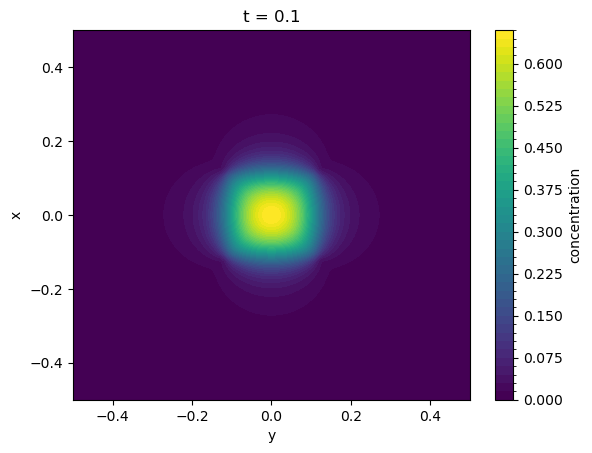

In [10]:
xr.plot.contourf(result_ds_sql['concentration'].isel(t=1000), levels=50)


### Triangle pattern

In [ ]:
diffusion_t2 = create_soil_geometry(conc, triangle_2, [D_high, D_midium], D_background)
result_ds_t2 = forward_euler_final(conc, diffusion_t2, initial_condition, sources)


In [ ]:
xr.plot.contourf(result_ds_t2['concentration'].isel(t=2999), levels=50)